## Load the Necessary Packages

In [6]:
%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.append('/Users/lieli/ATTIICC/')
import ATTIICCpackage as ac
from ATTIICCpackage import create_directories
# from ATTIICCpackage import run_imagej_macro
from ATTIICCpackage import seg_subfolder, display_images_with_masks, seg_all_subfolders
from ATTIICCpackage import move_empty_zip_files_recursively
from ATTIICCpackage import process_images_bg_rolling_ball


from ATTIICCpackage import load_csv_files_from_subfolders as load 
from ATTIICCpackage import process_and_save_cell_count
from ATTIICCpackage import merge_and_clean_dataframes as merge
from ATTIICCpackage import classify_cell_types as classify
from ATTIICCpackage import correct_cell_types as correct
from ATTIICCpackage import process_classified_data as process
from ATTIICCpackage import calculate_proximity as proximity

from ATTIICCpackage import fill_missing_frames,add_trends_to_dataframe,add_event_column

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Make Directories for the Project

In [2]:
root_dir = "/Users/lieli/Documents/PROJECTS/test_1c"
sub_dirs = ["cropped_ori", "cropped_ori_bg", "cropped_ori_d3","data","measurements","measurements_using_seg_ori_d3","models","scripts","seg_cropped"]

make_dirs = create_directories(root_dir, sub_dirs)

Root directory created: /Users/lieli/Documents/PROJECTS/test_1c
Subdirectory created: /Users/lieli/Documents/PROJECTS/test_1c/cropped_ori
Subdirectory created: /Users/lieli/Documents/PROJECTS/test_1c/cropped_ori_bg
Subdirectory created: /Users/lieli/Documents/PROJECTS/test_1c/cropped_ori_d3
Subdirectory created: /Users/lieli/Documents/PROJECTS/test_1c/data
Subdirectory created: /Users/lieli/Documents/PROJECTS/test_1c/measurements
Subdirectory created: /Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3
Subdirectory created: /Users/lieli/Documents/PROJECTS/test_1c/models
Subdirectory created: /Users/lieli/Documents/PROJECTS/test_1c/scripts
Subdirectory created: /Users/lieli/Documents/PROJECTS/test_1c/seg_cropped


## Run ImageJ Macros for Cropping Images to Microwell Regions
1. Crop Brightfield (BF) Images: For accurate cell segmentation.
2. Crop Fluorescence (FL) Raw Images: To enable background subtraction and subsequent measurements.

In [ ]:
import imagej
import javabridge

java_home = '/Applications/Fiji.app/java/macosx/zulu8.60.0.21-ca-fx-jdk8.0.322-macosx_x64/jre/Contents/Home'

ij = imagej.init()

run_imagej_macro('/path/to/your/macro.ijm', '/path/to/input_dir', '/path/to/output_dir', '/path/to/roi_dir')

# Background subtraction using rolling_ball


In [3]:
input_folder = '/Users/lieli/Documents/PROJECTS/test_1c/cropped_ori'
output_folder = '/Users/lieli/Documents/PROJECTS/test_1c/cropped_ori_bg'
radius_d0 = 20  # radius value for 'd0' images
radius_d1 = 30 # radius value for 'd1' images
radius_d2 = 20  # radius value for 'd2' images

process_images_bg_rolling_ball(input_folder, output_folder, radius_d0, radius_d1, radius_d2)

Processed and saved: /Users/lieli/Documents/PROJECTS/test_1c/cropped_ori_bg/f00d2/p20_0_A01f00d2_ROI_4_bg.png
Processed and saved: /Users/lieli/Documents/PROJECTS/test_1c/cropped_ori_bg/f00d2/p30_0_A01f00d2_ROI_50_bg.png
Processed and saved: /Users/lieli/Documents/PROJECTS/test_1c/cropped_ori_bg/f00d2/p40_0_A01f00d2_ROI_47_bg.png
Processed and saved: /Users/lieli/Documents/PROJECTS/test_1c/cropped_ori_bg/f00d2/p110_0_A01f00d2_ROI_60_bg.png
Processed and saved: /Users/lieli/Documents/PROJECTS/test_1c/cropped_ori_bg/f00d2/p40_0_A01f00d2_ROI_53_bg.png
Processed and saved: /Users/lieli/Documents/PROJECTS/test_1c/cropped_ori_bg/f00d2/p30_0_A01f00d2_ROI_44_bg.png
Processed and saved: /Users/lieli/Documents/PROJECTS/test_1c/cropped_ori_bg/f00d2/p110_0_A01f00d2_ROI_48_bg.png
Processed and saved: /Users/lieli/Documents/PROJECTS/test_1c/cropped_ori_bg/f00d2/p20_0_A01f00d2_ROI_23_bg.png
Processed and saved: /Users/lieli/Documents/PROJECTS/test_1c/cropped_ori_bg/f00d2/p50_0_A01f00d2_ROI_34_bg.png


## Run cellpose model (cellpose3 or pretrained model) for the whole dataset

please skip to the code block for process a subfolder files at a time code

Found 1048 images in subfolder: /Users/lieli/Documents/PROJECTS/test_1c/cropped_ori_d3/f00d3_png


/Users/lieli/ATTIICC/ATTIICCpackage/cell_segmentation_cp.py:35: UserWarning: /Users/lieli/Documents/PROJECTS/test_1c/seg_cropped_ori_d3/f00d3_png/p130_0_A01f00d3_ROI_5_label.png is a low contrast image
  io.imsave(os.path.join(output_subfolder, f"{name}_label{ext}"), masks.astype('uint16'))  # Save masks as 16-bit image
/Users/lieli/ATTIICC/ATTIICCpackage/cell_segmentation_cp.py:35: UserWarning: /Users/lieli/Documents/PROJECTS/test_1c/seg_cropped_ori_d3/f00d3_png/p80_0_A01f00d3_ROI_67_label.png is a low contrast image
  io.imsave(os.path.join(output_subfolder, f"{name}_label{ext}"), masks.astype('uint16'))  # Save masks as 16-bit image
/Users/lieli/ATTIICC/ATTIICCpackage/cell_segmentation_cp.py:35: UserWarning: /Users/lieli/Documents/PROJECTS/test_1c/seg_cropped_ori_d3/f00d3_png/p60_0_A01f00d3_ROI_49_label.png is a low contrast image
  io.imsave(os.path.join(output_subfolder, f"{name}_label{ext}"), masks.astype('uint16'))  # Save masks as 16-bit image
/Users/lieli/ATTIICC/ATTIICCpackag

Displaying images from subfolder: f00d3_png


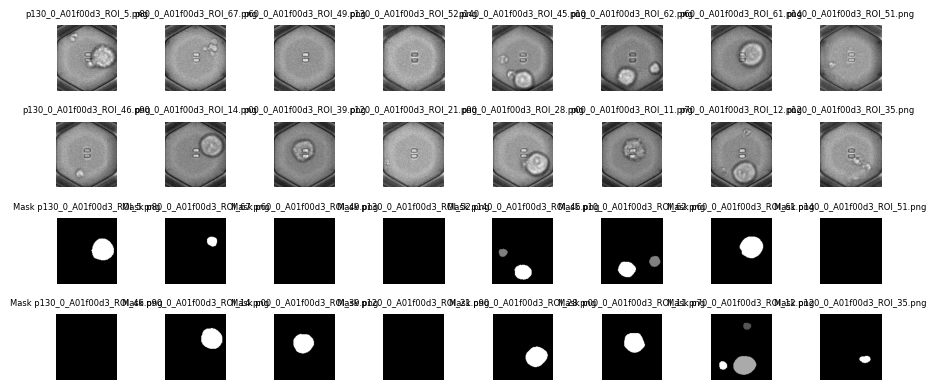

Found 1049 images in subfolder: /Users/lieli/Documents/PROJECTS/test_1c/cropped_ori_d3/f01d3_png


/Users/lieli/ATTIICC/ATTIICCpackage/cell_segmentation_cp.py:35: UserWarning: /Users/lieli/Documents/PROJECTS/test_1c/seg_cropped_ori_d3/f01d3_png/p20_0_A01f01d3_ROI_9_label.png is a low contrast image
  io.imsave(os.path.join(output_subfolder, f"{name}_label{ext}"), masks.astype('uint16'))  # Save masks as 16-bit image
/Users/lieli/ATTIICC/ATTIICCpackage/cell_segmentation_cp.py:35: UserWarning: /Users/lieli/Documents/PROJECTS/test_1c/seg_cropped_ori_d3/f01d3_png/p120_0_A01f01d3_ROI_2_label.png is a low contrast image
  io.imsave(os.path.join(output_subfolder, f"{name}_label{ext}"), masks.astype('uint16'))  # Save masks as 16-bit image
/Users/lieli/ATTIICC/ATTIICCpackage/cell_segmentation_cp.py:35: UserWarning: /Users/lieli/Documents/PROJECTS/test_1c/seg_cropped_ori_d3/f01d3_png/p40_0_A01f01d3_ROI_38_label.png is a low contrast image
  io.imsave(os.path.join(output_subfolder, f"{name}_label{ext}"), masks.astype('uint16'))  # Save masks as 16-bit image
/Users/lieli/ATTIICC/ATTIICCpackage

Displaying images from subfolder: f01d3_png


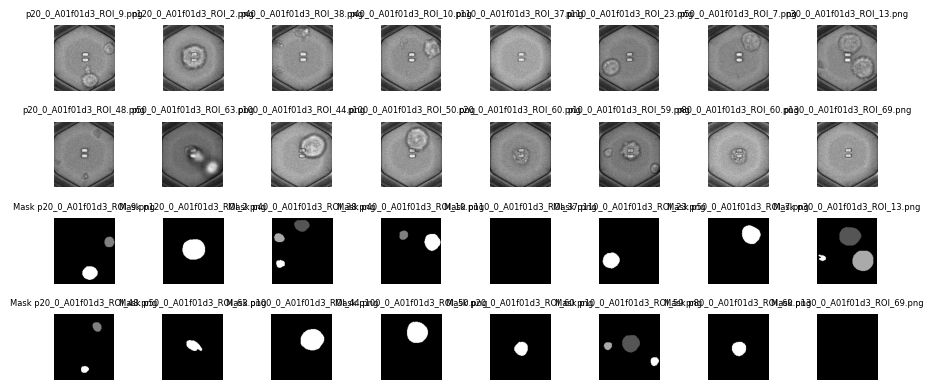

In [4]:
saved_model_path = '/Users/lieli/Documents/PROJECTS/test_1a/models/CP_20240924_mix'
input_directory = '/Users/lieli/Documents/PROJECTS/test_1c/cropped_ori_d3'
output_directory = '/Users/lieli/Documents/PROJECTS/test_1c/seg_cropped_ori_d3'
seg_all_subfolders(saved_model_path,input_directory, output_directory)

## Remove empty ROI files in order to use the downstream imageJ Macro for measurements

In [5]:
# Set the directories
source_dir = '/Users/lieli/Documents/PROJECTS/test_1c/seg_cropped_ori_d3'
dest_dir = "/Users/lieli/Documents/PROJECTS/test_1c/empty_zip_files_d3/"

# Move all empty zip files from the source directory and its subfolders to the destination directory
move_empty_zip_files_recursively(source_dir, dest_dir)

Moving empty ROI file: /Users/lieli/Documents/PROJECTS/test_1c/seg_cropped_ori_d3/f00d3_png/p90_0_A01f00d3_ROI_51_rois_rois.zip to /Users/lieli/Documents/PROJECTS/test_1c/empty_zip_files_d3/f00d3_png/p90_0_A01f00d3_ROI_51_rois_rois.zip
Moving empty ROI file: /Users/lieli/Documents/PROJECTS/test_1c/seg_cropped_ori_d3/f00d3_png/p80_0_A01f00d3_ROI_10_rois_rois.zip to /Users/lieli/Documents/PROJECTS/test_1c/empty_zip_files_d3/f00d3_png/p80_0_A01f00d3_ROI_10_rois_rois.zip
Moving empty ROI file: /Users/lieli/Documents/PROJECTS/test_1c/seg_cropped_ori_d3/f00d3_png/p100_0_A01f00d3_ROI_21_rois_rois.zip to /Users/lieli/Documents/PROJECTS/test_1c/empty_zip_files_d3/f00d3_png/p100_0_A01f00d3_ROI_21_rois_rois.zip
Moving empty ROI file: /Users/lieli/Documents/PROJECTS/test_1c/seg_cropped_ori_d3/f00d3_png/p50_0_A01f00d3_ROI_22_rois_rois.zip to /Users/lieli/Documents/PROJECTS/test_1c/empty_zip_files_d3/f00d3_png/p50_0_A01f00d3_ROI_22_rois_rois.zip
Moving empty ROI file: /Users/lieli/Documents/PROJECTS

In [10]:
# Define a function to load images from a folder and its subfolders
def load_images_from_folder(folder_path):
    image_files = []
    
    # Traverse the folder and all subfolders
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # Filter for image files (you can adjust the extensions as needed)
            if file.endswith('.tif') or file.endswith('.png') or file.endswith('.jpg'):
                image_files.append(os.path.join(root, file))
    
    # Load the images using Cellpose io or skimage io
    images = [io.imread(image_path) for image_path in image_files]
    return images

In [13]:
# load images from a folder
folder_path = '/Users/lieli/Documents/PROJECTS/test_1c/cropped_ori_d3/f00d3_png'
images = load_images_from_folder(folder_path)
images

[array([[131, 137, 130, ..., 135, 140, 140],
        [135, 128, 128, ..., 127, 133, 142],
        [127, 129, 124, ..., 111, 117, 129],
        ...,
        [113, 119, 103, ..., 100, 109, 104],
        [135, 128, 127, ..., 112, 124, 131],
        [130, 139, 137, ..., 125, 132, 153]], dtype=uint8),
 array([[158, 148, 153, ..., 142, 143, 146],
        [159, 150, 154, ..., 139, 140, 136],
        [152, 144, 141, ..., 121, 135, 126],
        ...,
        [137, 128, 109, ..., 123, 111, 110],
        [150, 133, 124, ..., 110, 122, 124],
        [156, 164, 148, ..., 130, 136, 144]], dtype=uint8),
 array([[152, 153, 164, ..., 165, 172, 163],
        [159, 154, 150, ..., 153, 171, 155],
        [147, 160, 138, ..., 130, 143, 153],
        ...,
        [143, 129, 109, ..., 122, 121, 121],
        [160, 154, 135, ..., 115, 122, 130],
        [163, 165, 155, ..., 129, 148, 161]], dtype=uint8),
 array([[142, 132, 131, ..., 136, 142, 139],
        [127, 133, 127, ..., 126, 128, 146],
        [118, 12

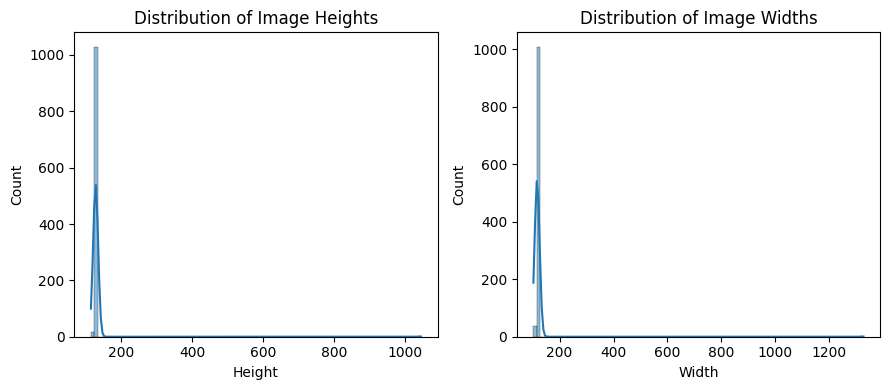

Number of loaded images: 1048
Image Height: 128.07729007633588 +/- 28.39701377118946
Image Width: 117.81202290076335 +/- 37.40074375899915


In [20]:
# load images from a folder
folder_path = '/Users/lieli/Documents/PROJECTS/test_1c/cropped_ori_d3/f00d3_png'
images = load_images_from_folder(folder_path)

# Check loaded images,For a colored image (RGB): cellpose io img.shape will return a 3D tuple like (height, width, channels), where the number of channels is typically 3.
data = {'Width': [], 'Height': []} 
for img in images:
    height, width = img.shape[:2]  #
    height, width 
    data['Width'].append(width)
    data['Height'].append(height)
    
    #data['Channels'].append(channels)

# Create DataFrame for the image shape
df_img = pd.DataFrame(data)

# Plot distribution for Height and Width
plt.figure(figsize=(9, 4))

# Histogram for height
plt.subplot(1, 2, 1)
sns.histplot(df_img['Height'], kde=True,bins=100)
plt.title('Distribution of Image Heights')

# Histogram for width
plt.subplot(1, 2, 2)
sns.histplot(df_img['Width'], kde=True,bins=100)
plt.title('Distribution of Image Widths')

plt.tight_layout()
plt.show()

# Check the number of loaded images
num_images = len(images)
print(f'Number of loaded images: {num_images}')

# print the height aveage/width average with standard deviation
print(f"Image Height: {df_img['Height'].mean()} +/- {df_img['Height'].std()}")
print(f"Image Width: {df_img['Width'].mean()} +/- {df_img['Width'].std()}")

In [21]:
print(df_img.describe())
print(df_img.head())
print(images[0].shape)

df_img[df_img['Height'] >= 200]


             Width       Height
count  1048.000000  1048.000000
mean    117.812023   128.077290
std      37.400744    28.397014
min     103.000000   114.000000
25%     116.000000   127.000000
50%     117.000000   127.000000
75%     117.000000   128.000000
max    1327.000000  1045.000000
   Width  Height
0    115     128
1    116     127
2    116     127
3    117     126
4    117     127
(128, 115)


Width  Height
925   1327    1045

## Take a subset of the images data and do a test segmentation by cyto3 or pretrained model, then decide to use which one for the whole dataset

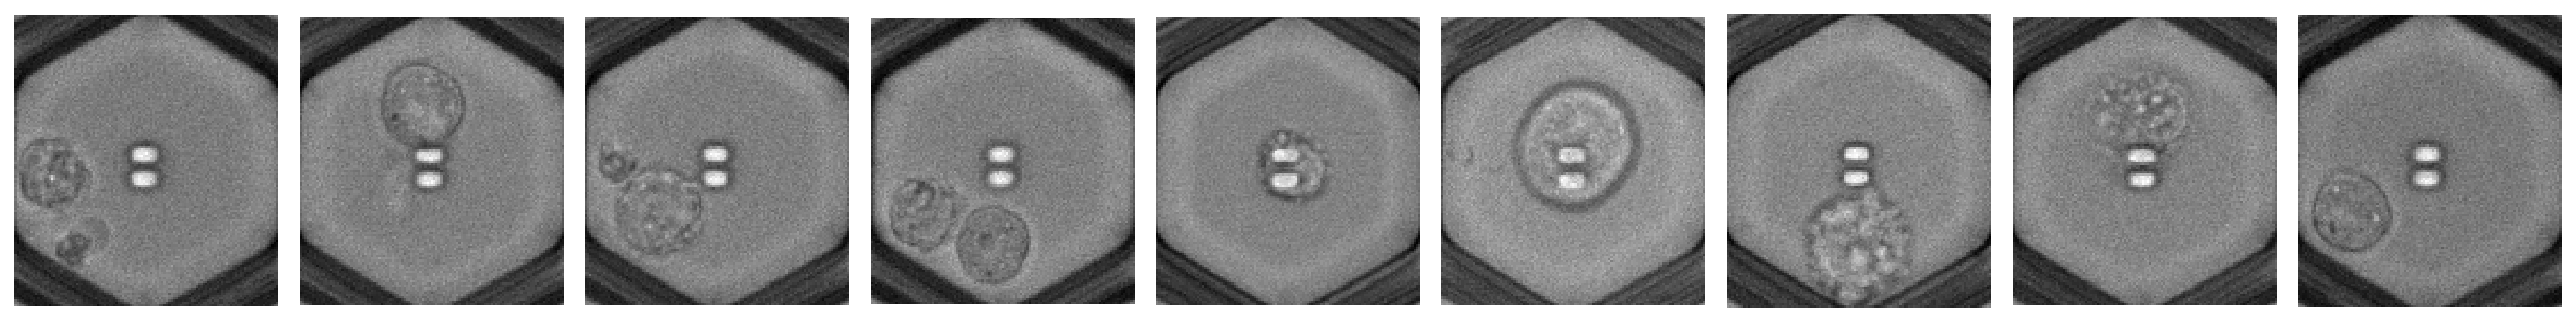

In [6]:
# define the number of samples to take
num_samples = 9

# Take a subset of the images by random sampling their indices
np.random.seed(0)
random_indices = np.random.choice(num_images, num_samples, replace=False)

images_subset = [images[i] for i in random_indices]

# Display the subset of images
fig, axes = plt.subplots(1, 9, figsize=(18, 9))
for ax, image in zip(axes.ravel(), images_subset):
    ax.imshow(image, cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()

>>> loaded test data with 8 images
>>> loaded test labels with 8 masks


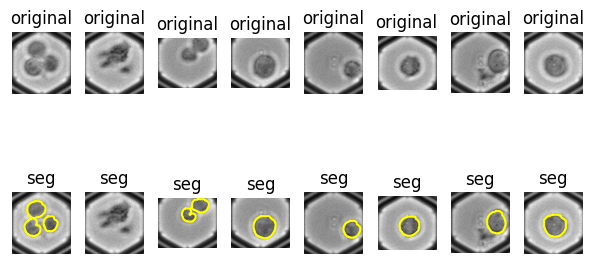

ap:[[ 1.]
 [nan]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]
tp:[[3.]
 [0.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
fp:[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
fn:[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [4]:
# model evaluation, didnt put into the package yet

from cellpose import core, utils, io, models, metrics
import matplotlib.pyplot as plt
import numpy as np

test_dir = '/Users/lieli/Documents/PROJECTS/test_tumor_only/train_model/test'

output = io.load_train_test_data(test_dir, mask_filter='_seg.npy')
test_data, test_labels = output[:2]

print(f'>>> loaded test data with {len(test_data)} images')
print(f'>>> loaded test labels with {len(test_labels)} masks')

# run model on test images
saved_model_path = '/Users/lieli/Documents/PROJECTS/test_tumor_only/models/CP_20240919_tumor_cyto2'
# Load the existing model
model = models.CellposeModel(gpu=True, pretrained_model=saved_model_path)

masks, flows, styles= model.eval(test_data, diameter=None, channels=[0,0])

plt.figure(figsize=(6,4))
for i in range(len(test_data)):
    img = test_data[i].squeeze()
    plt.subplot(2, 8, 1 + i)
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.title("original")
    
    plt.subplot(2,8,9+i)
    plt.imshow(img, cmap="gray")
    outlines = utils.outlines_list(masks[i])
    for o in outlines:
        plt.plot(o[:,0], o[:,1], color=[1,1,0])
    plt.axis('off')
    plt.title("seg")

plt.tight_layout()
plt.show()

#print(type(test_labels),type(masks))
# check performance using ground truth labels
ap,tp,fp,fn= metrics.average_precision(test_labels, masks,threshold=0.5)
#print('')
#print(f'>>> average precision at iou threshold 0.5 = {ap[:,0].mean():.3f}')
print(f"ap:{ap}\ntp:{tp}\nfp:{fp}\nfn:{fn}")   

In [36]:
metrics.average_precision(test_labels, masks)[0]

array([[ 1.,  1.,  0.],
       [nan, nan, nan],
       [ 1.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  1.]], dtype=float32)

In [34]:
# this is the original function from cellpose.metrics
def average_precision(masks_true, masks_pred, threshold=[0.5, 0.75, 0.9]):
    """ 
    Average precision estimation: AP = TP / (TP + FP + FN)

    This function is based heavily on the *fast* stardist matching functions
    (https://github.com/mpicbg-csbd/stardist/blob/master/stardist/matching.py)

    Args:
        masks_true (list of np.ndarrays (int) or np.ndarray (int)): 
            where 0=NO masks; 1,2... are mask labels
        masks_pred (list of np.ndarrays (int) or np.ndarray (int)): 
            np.ndarray (int) where 0=NO masks; 1,2... are mask labels

    Returns:
        ap (array [len(masks_true) x len(threshold)]): 
            average precision at thresholds
        tp (array [len(masks_true) x len(threshold)]): 
            number of true positives at thresholds
        fp (array [len(masks_true) x len(threshold)]): 
            number of false positives at thresholds
        fn (array [len(masks_true) x len(threshold)]): 
            number of false negatives at thresholds
    """
    not_list = False
    if not isinstance(masks_true, list):
        masks_true = [masks_true]
        masks_pred = [masks_pred]
        not_list = True
    if not isinstance(threshold, list) and not isinstance(threshold, np.ndarray):
        threshold = [threshold]

    if len(masks_true) != len(masks_pred):
        raise ValueError(
            "metrics.average_precision requires len(masks_true)==len(masks_pred)")

    ap = np.zeros((len(masks_true), len(threshold)), np.float32)
    tp = np.zeros((len(masks_true), len(threshold)), np.float32)
    fp = np.zeros((len(masks_true), len(threshold)), np.float32)
    fn = np.zeros((len(masks_true), len(threshold)), np.float32)
    n_true = np.array(list(map(np.max, masks_true)))
    n_pred = np.array(list(map(np.max, masks_pred)))

    for n in range(len(masks_true)):
        #_,mt = np.reshape(np.unique(masks_true[n], return_index=True), masks_pred[n].shape)
        if n_pred[n] > 0:
            iou = _intersection_over_union(masks_true[n], masks_pred[n])[1:, 1:]
            for k, th in enumerate(threshold):
                tp[n, k] = _true_positive(iou, th)
        fp[n] = n_pred[n] - tp[n]
        fn[n] = n_true[n] - tp[n]
        ap[n] = tp[n] / (tp[n] + fp[n] + fn[n])

    if not_list:
        ap, tp, fp, fn = ap[0], tp[0], fp[0], fn[0]
    return ap, tp, fp, fn

## Run ImageJ Macro for Measuring Image Features

1. Measure features of preprocessed Fluorescence (FL) channel microwell images.

In [ ]:
ij = imagej.init()

run_imagej_macro('/path/to/your/macro.ijm', '/path/to/input_dir', '/path/to/output_dir', '/path/to/roi_dir')

# Micro image analysis for nanowell test data

Using the environment 'cellpose' (Python 3.9.19) with the ATTIICC package installed in editable mode (-e)

Note: The plotting code is not yet included in the package

# Data loading and transformation
1. Load and transform the data for analysis;
2. Save the processed data for furtur use.

In [24]:
# load the csv files
df0_path = '/Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3'
subfolder_suffix_df0 = 'd0'
output_csv_df0 = '/Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/cropped_d0_output.csv'

df1_path = '/Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3'
subfolder_suffix_df1 = 'd1'
output_csv_df1 = '/Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/cropped_d1_output.csv'

df2_path = '/Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3'
subfolder_suffix_df2 = 'd2'
output_csv_df2 = '/Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/cropped_d2_output.csv'

# Call the function to load and process the data
df0 = load(df0_path, subfolder_suffix_df0,output_csv_df0)
df1 = load(df1_path, subfolder_suffix_df1,output_csv_df1)
df2 = load(df2_path, subfolder_suffix_df2,output_csv_df2)
print(df0.shape, df1.shape, df2.shape)

Loaded: /Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/f01d0/p80_0_A01f01d0_ROI_17_measurements.csv with field: f01
Loaded: /Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/f01d0/p80_0_A01f01d0_ROI_29_measurements.csv with field: f01
Loaded: /Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/f01d0/p60_0_A01f01d0_ROI_51_measurements.csv with field: f01
Loaded: /Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/f01d0/p20_0_A01f01d0_ROI_56_measurements.csv with field: f01
Loaded: /Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/f01d0/p130_0_A01f01d0_ROI_19_measurements.csv with field: f01
Loaded: /Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/f01d0/p90_0_A01f01d0_ROI_45_measurements.csv with field: f01
Loaded: /Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/f01d0/p70_0_A01f01d0_ROI_7_measurements.csv with field: f01
Loaded: /Users/lieli/Docume

In [29]:
# Process each dataframe and save the result
df0_cell_count = process_and_save_cell_count(df0, '/Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/cropped_d0_output_cell_count.csv')
df1_cell_count = process_and_save_cell_count(df1, '/Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/cropped_d1_output_cell_count.csv')
df2_cell_count = process_and_save_cell_count(df2, '/Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/cropped_d2_output_cell_count.csv')
print(df0_cell_count.shape, df1_cell_count.shape, df2_cell_count.shape)

Saved updated dataframe to /Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/cropped_d0_output_cell_count.csv
Saved updated dataframe to /Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/cropped_d1_output_cell_count.csv
Saved updated dataframe to /Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/cropped_d2_output_cell_count.csv
(2776, 15) (2776, 15) (2776, 15)


In [30]:
df0_cell_count['cell_count'].describe()

df0_cell_count[df0_cell_count['cell_count']>10][['field','frame','well']].drop_duplicates()


Empty DataFrame
Columns: [field, frame, well]
Index: []

In [ ]:
type(df1)

pandas.core.frame.DataFrame

In [28]:
# remove the records that are whole field images which are unexpected cropped images, from unexpected ROI
df1 = df1[~(
    ((df1['field'] == 'f00') & (df1['frame']== 0) & (df1['well'] == 36)) |
    ((df1['field'] == 'f01') & (df1['frame']== 0) & (df1['well'] == 36))     
    )]
df0 = df0[~(
    ((df0['field'] == 'f00') & (df0['frame']==0) & (df0['well'] == 36)) |
    ((df0['field'] == 'f01') & (df0['frame']==0) & (df0['well'] == 36))  
    
)]
df2 = df2[~(
   ((df2['field'] == 'f00') & (df2['frame']== 0) & (df2['well'] == 36)) |
   ((df2['field'] == 'f01') & (df2['frame']== 0) & (df2['well'] == 36))  
    
)]

In [31]:
df0.shape, df1.shape, df2.shape

((2776, 15), (2776, 15), (2776, 15))

In [32]:
# save the updated dataframes
df0.to_csv('/Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/cropped_d0_output.csv', index=False)
df1.to_csv('/Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/cropped_d1_output.csv', index=False)
df2.to_csv('/Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/cropped_d2_output.csv', index=False)

# DEA Data Explore
1. Distribution of mean intensity, area, circ., aspect ratio, round, solidity: These metrics may assist in identifying cell type;
2. Mean of "mean_intensity" across the frames for each channel: This can help to determine the unmix values in experiments, particularly using T or Tumor cell only experiments;
3. Visulization of single micro well cell movement trajactories: Useful for tracking cell behavior.

In [33]:
# load the csv files
df0=pd.read_csv('/Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/cropped_d0_output.csv')
df1=pd.read_csv('/Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/cropped_d1_output.csv')
df2=pd.read_csv('/Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/cropped_d2_output.csv')
print(df0.shape, df1.shape, df2.shape)

(2776, 15) (2776, 15) (2776, 15)


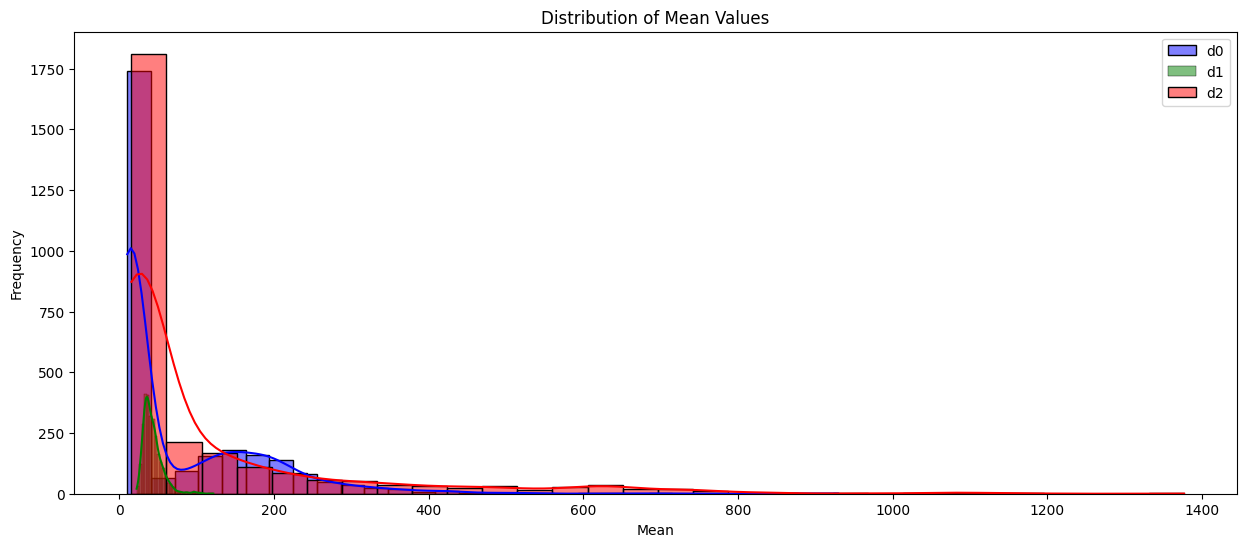

In [34]:
plt.figure(figsize=(15, 6))
sns.histplot(df0['mean_intensity_d0'], bins=30, kde=True, color='blue', label='d0')
sns.histplot(df1['mean_intensity_d1'], bins=30, kde=True, color='green', label='d1')
sns.histplot(df2['mean_intensity_d2'], bins=30, kde=True, color='red', label='d2')
plt.legend()
plt.xlabel('Mean')
plt.ylabel('Frequency')
#plt.xlim(0, 100)
plt.title('Distribution of Mean Values')
plt.show()

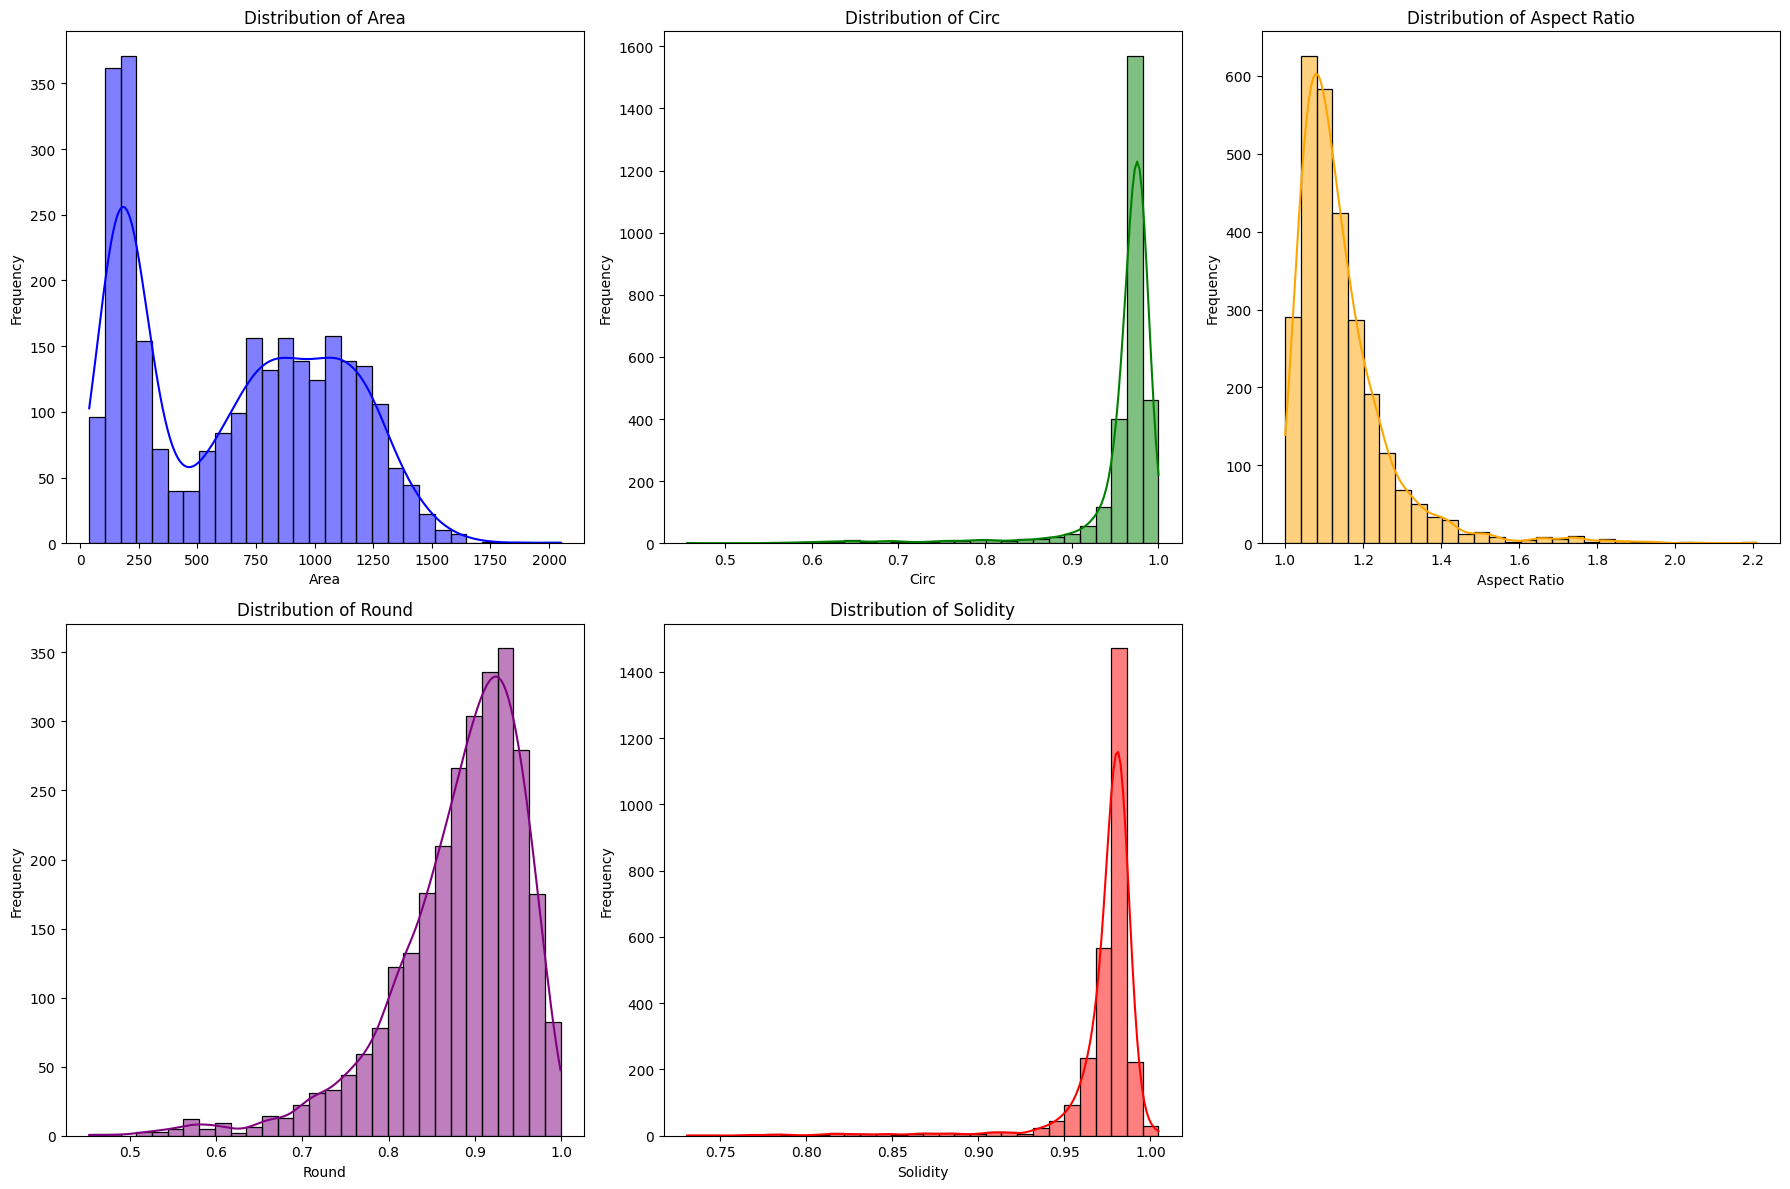

In [35]:

# Create a figure with subplots arranged in a 2x3 grid (adjust based on the number of features)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot Area
sns.histplot(df0['area'], bins=30, kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Area')
axes[0, 0].set_xlabel('Area')
axes[0, 0].set_ylabel('Frequency')

# Plot Circ
sns.histplot(df0['circ.'], bins=30, kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Circ')
axes[0, 1].set_xlabel('Circ')
axes[0, 1].set_ylabel('Frequency')

# Plot Aspect_Ratio
sns.histplot(df0['ar'], bins=30, kde=True, color='orange', ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Aspect Ratio')
axes[0, 2].set_xlabel('Aspect Ratio')
axes[0, 2].set_ylabel('Frequency')

# Plot Round
sns.histplot(df0['round'], bins=30, kde=True, color='purple', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Round')
axes[1, 0].set_xlabel('Round')
axes[1, 0].set_ylabel('Frequency')

# Plot Solidity
sns.histplot(df0['solidity'], bins=30, kde=True, color='red', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Solidity')
axes[1, 1].set_xlabel('Solidity')
axes[1, 1].set_ylabel('Frequency')

# Remove the empty subplot (axes[1, 2])
fig.delaxes(axes[1, 2])

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


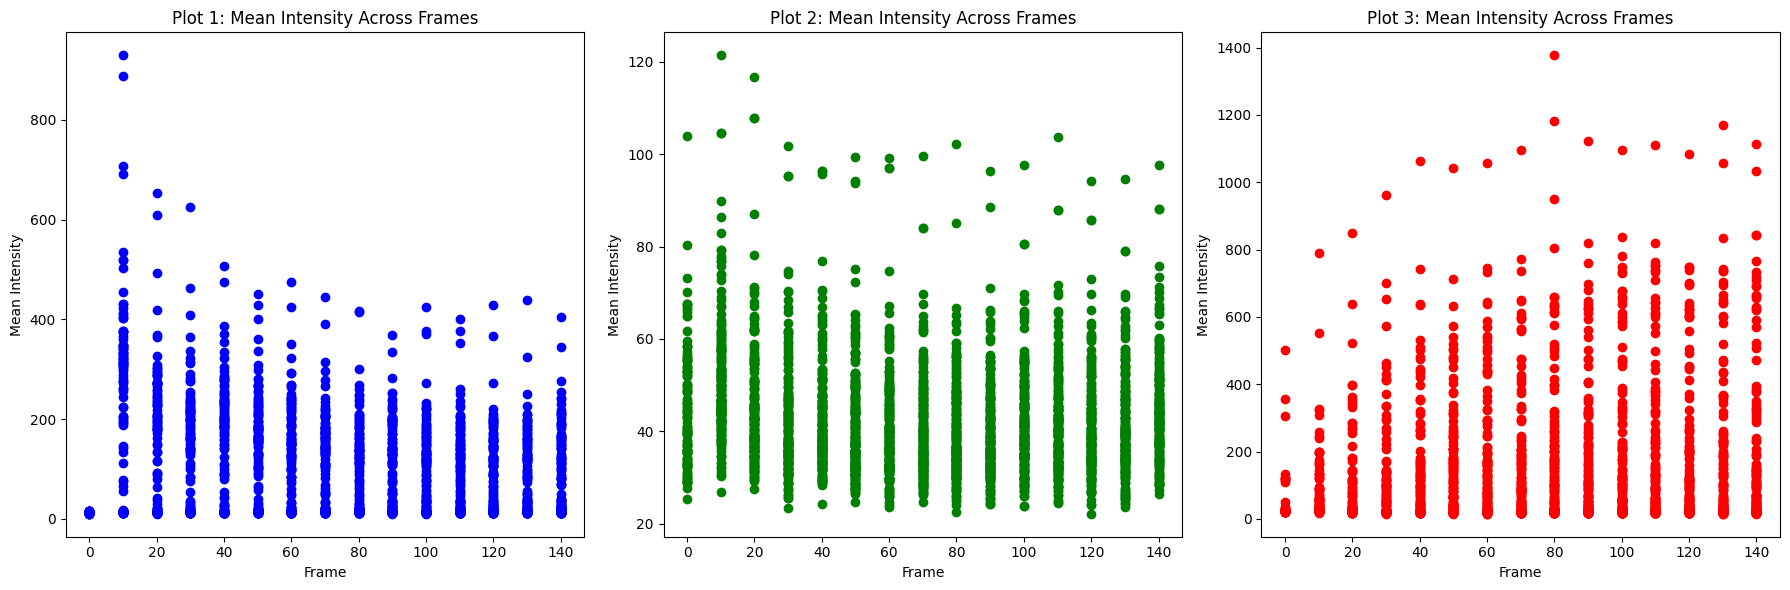

In [37]:
# Create a scatter plot for FL intensity across frames
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1
axes[0].plot(df0['frame'], df0['mean_intensity_d0'], marker='o', linestyle='None', color='blue')
axes[0].set_xlabel('Frame')
axes[0].set_ylabel('Mean Intensity')
axes[0].set_title('Plot 1: Mean Intensity Across Frames')
#axes[0].set_ylim(0, 100)  # Set the y-axis limits

# Plot 2
axes[1].plot(df1['frame'], df1['mean_intensity_d1'], marker='o', linestyle='None', color='green')
axes[1].set_xlabel('Frame')
axes[1].set_ylabel('Mean Intensity')
axes[1].set_title('Plot 2: Mean Intensity Across Frames')
#axes[1].set_ylim(0, 150)
# Plot 3
axes[2].plot(df2['frame'], df2['mean_intensity_d2'], marker='o', linestyle='None', color='red')
axes[2].set_xlabel('Frame')
axes[2].set_ylabel('Mean Intensity')
axes[2].set_title('Plot 3: Mean Intensity Across Frames')
#axes[2].set_ylim(0, 100)
# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


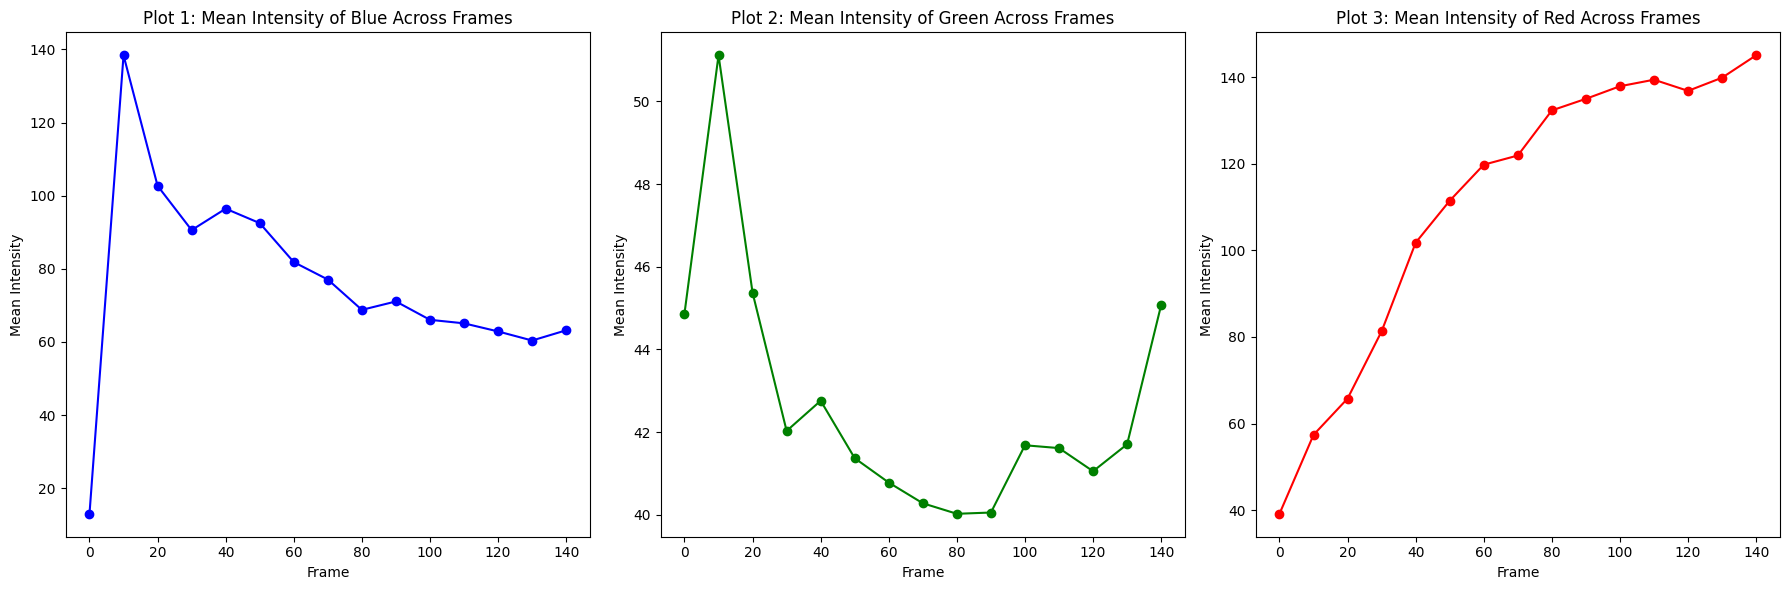

In [38]:
# Display mean of "mean_intensity" across the frames for each channel
# Calculate the mean of "Mean_intensity" across the frames for each dataframe
mean_intensity_d0 = df0.groupby('frame')['mean_intensity_d0'].mean()
mean_intensity_d1 = df1.groupby('frame')['mean_intensity_d1'].mean()
mean_intensity_d2 = df2.groupby('frame')['mean_intensity_d2'].mean()

# Create a figure with three subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1
axes[0].plot(mean_intensity_d0.index, mean_intensity_d0.values, marker='o', linestyle='-', color='blue')
axes[0].set_xlabel('Frame')
axes[0].set_ylabel('Mean Intensity')
axes[0].set_title('Plot 1: Mean Intensity of Blue Across Frames')
#axes[0].set_ylim(0, 100)

# Plot 2
axes[1].plot(mean_intensity_d1.index, mean_intensity_d1.values, marker='o', linestyle='-', color='green')
axes[1].set_xlabel('Frame')
axes[1].set_ylabel('Mean Intensity')
axes[1].set_title('Plot 2: Mean Intensity of Green Across Frames')
#axes[1].set_ylim(0, 100)
# Plot 3
axes[2].plot(mean_intensity_d2.index, mean_intensity_d2.values, marker='o', linestyle='-', color='red')
axes[2].set_xlabel('Frame')
axes[2].set_ylabel('Mean Intensity')
axes[2].set_title('Plot 3: Mean Intensity of Red Across Frames')
#axes[2].set_ylim(0, 100)
# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


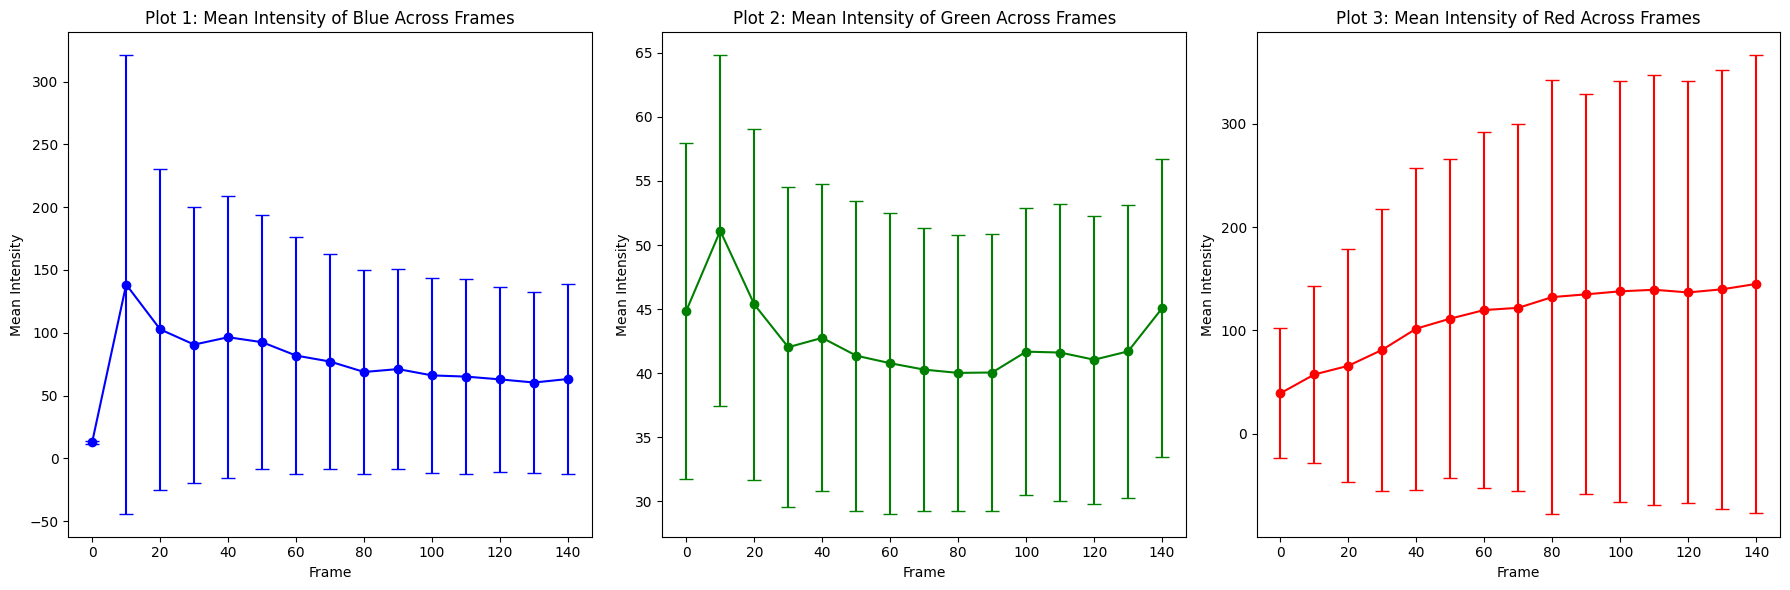

In [39]:
# add error bars to the plots

# Calculate the mean and standard deviation of "Mean_intensity" across the frames for each dataframe
mean_intensity_d0 = df0.groupby('frame')['mean_intensity_d0'].mean()
std_intensity_d0 = df0.groupby('frame')['mean_intensity_d0'].std()

mean_intensity_d1 = df1.groupby('frame')['mean_intensity_d1'].mean()
std_intensity_d1 = df1.groupby('frame')['mean_intensity_d1'].std()

mean_intensity_d2 = df2.groupby('frame')['mean_intensity_d2'].mean()
std_intensity_d2 = df2.groupby('frame')['mean_intensity_d2'].std()

# Create a figure with three subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1 with error bars
axes[0].errorbar(mean_intensity_d0.index, mean_intensity_d0.values, yerr=std_intensity_d0.values, 
                 marker='o', linestyle='-', color='blue', capsize=5)
axes[0].set_xlabel('Frame')
axes[0].set_ylabel('Mean Intensity')
axes[0].set_title('Plot 1: Mean Intensity of Blue Across Frames')
#axes[0].set_ylim(0, 100)
# Plot 2 with error bars
axes[1].errorbar(mean_intensity_d1.index, mean_intensity_d1.values, yerr=std_intensity_d1.values, 
                 marker='o', linestyle='-', color='green', capsize=5)
axes[1].set_xlabel('Frame')
axes[1].set_ylabel('Mean Intensity')
axes[1].set_title('Plot 2: Mean Intensity of Green Across Frames')
#axes[1].set_ylim(0, 100)
# Plot 3 with error bars
axes[2].errorbar(mean_intensity_d2.index, mean_intensity_d2.values, yerr=std_intensity_d2.values, 
                 marker='o', linestyle='-', color='red', capsize=5)
axes[2].set_xlabel('Frame')
axes[2].set_ylabel('Mean Intensity')
axes[2].set_title('Plot 3: Mean Intensity of Red Across Frames')
#axes[2].set_ylim(0, 100)
# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# display all the Well 1,5, 15 data

df0_f00_well1 = df0[(df0['well'] == 1) & (df0['field'] == 'f00')]
df1_f00_well1 = df1[(df1['well'] == 1) & (df1['field'] == 'f00')]
df2_f00_well1 = df2[(df2['well'] == 1) & (df2['field'] == 'f00')]

df0_f00_well5 = df0[(df0['well'] == 5) & (df0['field'] == 'f00')]
df1_f00_well5 = df1[(df1['well'] == 5) & (df1['field'] == 'f00')]
df2_f00_well5 = df2[(df2['well'] == 5) & (df2['field'] == 'f00')]

df0_f00_well15 = df0[(df0['well'] == 15) & (df0['field'] == 'f00')]
df1_f00_well15 = df1[(df1['well'] == 15) & (df1['field'] == 'f00')]
df2_f00_well15 = df2[(df2['well'] == 15) & (df2['field'] == 'f00')]

# df0_f00_well5

In [ ]:
# the interactive plot requires nbformat>=4.2.0, python 3.9 is not compatible with this version
import plotly.express as px

# Assuming df_well10 is already defined and contains the columns 'X', 'Y', 'Mean_intensity_d0', and 'Frame'

# Sample data for demonstration (uncomment if you need a sample dataframe)
# df_well10 = pd.DataFrame({
#     'X': np.random.rand(100),
#     'Y': np.random.rand(100),
#     'Mean_intensity_d0': np.random.rand(100) * 100,
#     'Frame': np.random.randint(1, 10, 100)
# })

# Create the scatter plot
# define the figure size


fig = px.scatter(df1_f00_well1, x='X', y='Y',  color='frame', size='area', hover_data=['mean_intensity_d1'],
                 animation_frame='frame', 
                 title='Scatter plot of X vs Y with Mean_intensity_d1 as size')

fig.update_layout(
    xaxis=dict(range=[0, 130]),
    yaxis=dict(range=[0, 130]),
    width=600,  # Set the width in pixels (8 inches * 100 pixels per inch)
    height=600,  # Set the height in pixels (6 inches * 100 pixels per inch)
    transition={'duration': 500}
)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# Cell Type Classification
1. Merge Dataframes
2. Use predefined thresholds to classify cells as effector, target and death based on the mean_intensity values.

In [40]:
# Merge the cropped d0, d1, d2 dataframes and remove the duplicated columns

# Load the dataframes
df0 = pd.read_csv('/Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/cropped_d0_output.csv')
df1 = pd.read_csv('/Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/cropped_d1_output.csv')
df2 = pd.read_csv('/Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/cropped_d2_output.csv')

output_csv = '/Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/cropped_merged_output.csv'

# Call the function to merge and clean the dataframes
df_merged = merge(df0, df1, df2, output_csv)
df_merged.shape

Dataframe saved to: /Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/cropped_merged_output.csv


(2776, 18)

In [41]:
print(df0.shape, df1.shape, df2.shape, df_merged.shape)

(2776, 15) (2776, 15) (2776, 15) (2776, 18)


In [42]:
# classify the cell types based on the FL intensity thresholds
thresholds_d0 = 18
thresholds_d1 = 35
thresholds_d2 = 30
df_classified = classify(df_merged, thresholds_d0, thresholds_d1, thresholds_d2) 
df_classified.to_csv('/Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/cropped_classified_output.csv', index=False)

# Display the first few rows of the dataframe with new columns
df_classified[['field','frame','well','cell','effector','target','death']]

field  frame  well  cell  effector  target  death
0      f00      0     1     1         0       1      0
1      f00     30     1     1         1       1      1
2      f00     40     1     1         1       0      1
3      f00     50     1     1         1       0      1
4      f00     60     1     1         1       0      1
...    ...    ...   ...   ...       ...     ...    ...
2771   f01     60    71     2         1       0      1
2772   f01      0    72     1         0       0      0
2773   f01     10    72     1         0       1      1
2774   f01     10    73     1         0       1      1
2775   f01      0    76     1         0       0      0

[2776 rows x 7 columns]

In [43]:
df_classified=pd.read_csv('/Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/cropped_classified_output.csv')
# summarize the number of effector=0 and target=1, effector=1 and target=0, effector=0 and target=0, effector=1,target=1
print(df_classified.groupby(['effector', 'target']).size().reset_index(name='count'))
df_classified.shape

   effector  target  count
0         0       0    404
1         0       1   1157
2         1       0    395
3         1       1    820


(2776, 21)

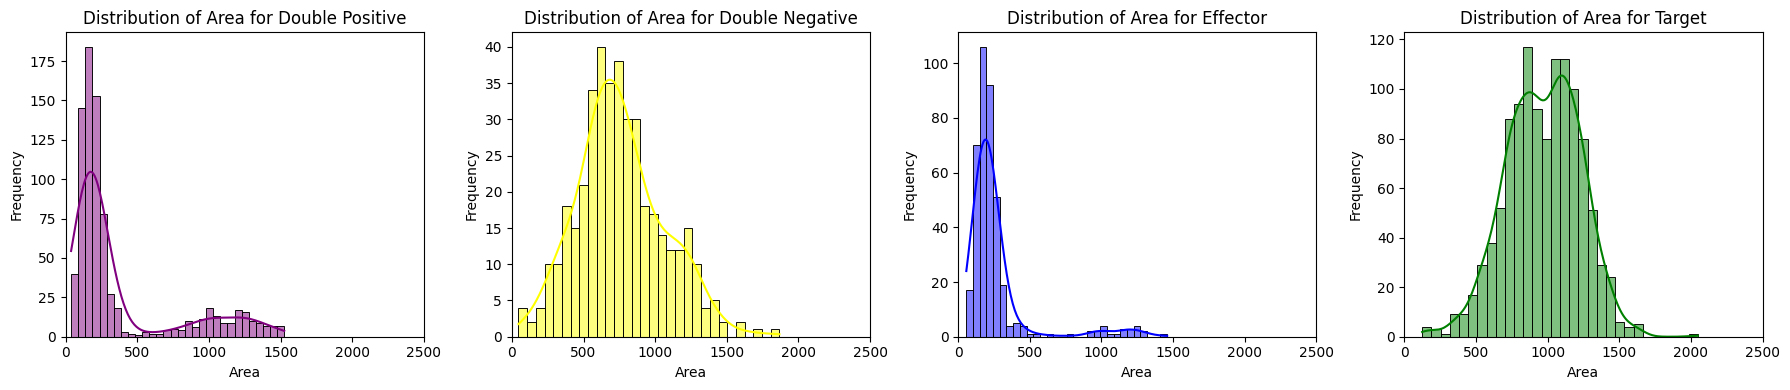

In [44]:
df_double_pos = df_classified[(df_classified['effector'] == 1) & (df_classified['target'] == 1)]
df_double_neg = df_classified[(df_classified['effector'] == 0) & (df_classified['target'] == 0)]
df_effector = df_classified[(df_classified['effector'] == 1) & (df_classified['target'] == 0)]
df_target = df_classified[(df_classified['effector'] == 0) & (df_classified['target'] == 1)]
# Create a  area distribution plot for each cell type
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

# Plot double_pos
sns.histplot(df_double_pos['area'], bins=30, kde=True, color='purple', ax=axes[0])
axes[0].set_title('Distribution of Area for Double Positive')
axes[0].set_xlabel('Area')
axes[0].set_xlim(0,2500)
axes[0].set_ylabel('Frequency')
#axes[0].set_ylim(0, 250)

# Plot double_neg
sns.histplot(df_double_neg['area'], bins=30, kde=True, color='yellow', ax=axes[1])
axes[1].set_title('Distribution of Area for Double Negative')
axes[1].set_xlabel('Area')
axes[1].set_xlim(0,2500)
axes[1].set_ylabel('Frequency')
#axes[1].set_ylim(0, 250)

# Plot effector
sns.histplot(df_effector['area'], bins=30, kde=True, color='blue', ax=axes[2])
axes[2].set_title('Distribution of Area for Effector')
axes[2].set_xlabel('Area')
axes[2].set_xlim(0,2500)
axes[2].set_ylabel('Frequency')
#axes[2].set_ylim(0, 250)

# Plot target
sns.histplot(df_target['area'], bins=30, kde=True, color='green', ax=axes[3])
axes[3].set_title('Distribution of Area for Target')
axes[3].set_xlabel('Area')
axes[3].set_xlim(0,2500)
axes[3].set_ylabel('Frequency')
#axes[3].set_ylim(0, 250)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [45]:
# correct the cell types based on the area thresholds
df = df_classified
area_threshold_d0 = 400
area_threshold_d1 = 500
output_path = '/Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/cropped_corrected_classified_output.csv'

df_classified_corrected = correct(df, area_threshold_d0, area_threshold_d1, output_path)

Before correction:
Double Positive Group (effector=1, target=1): (820, 21)
Effector Group (effector=1, target=0): (395, 21)
Double Negative Group (effector=0, target=0): (404, 21)
Target Group (effector=0, target=1): (1157, 21)
After correction:
Double Positive Group (effector=1, target=1): (173, 21)
Effector Group (effector=1, target=0): (1042, 21)
Double Negative Group (effector=0, target=0): (71, 21)
Target Group (effector=0, target=1): (1490, 21)


In [46]:
df_classified_corrected=pd.read_csv('/Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/cropped_corrected_classified_output.csv')
df_classified_corrected.shape

(2776, 21)

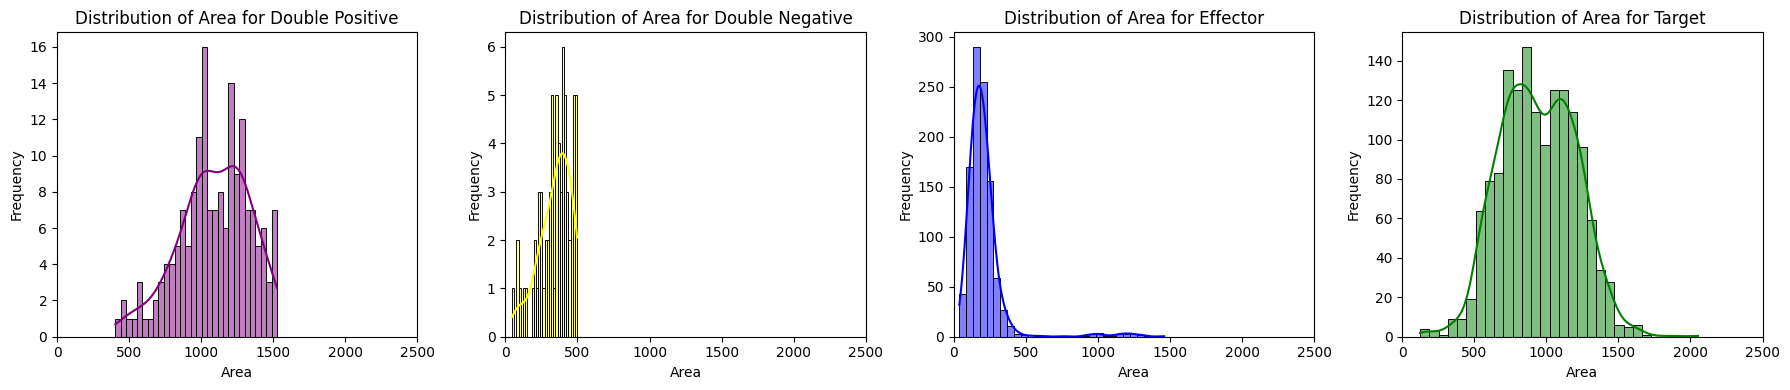

In [47]:
df_double_pos = df_classified_corrected[(df_classified_corrected['effector'] == 1) & (df_classified_corrected['target'] == 1)]
df_double_neg = df_classified_corrected[(df_classified_corrected['effector'] == 0) & (df_classified_corrected['target'] == 0)]
df_effector = df_classified_corrected[(df_classified_corrected['effector'] == 1) & (df_classified_corrected['target'] == 0)]
df_target = df_classified_corrected[(df_classified_corrected['effector'] == 0) & (df_classified_corrected['target'] == 1)]
# Create a figure to show the distribution of area for each cell type after correction
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

# Plot double_pos
sns.histplot(df_double_pos['area'], bins=30, kde=True, color='purple', ax=axes[0])
axes[0].set_title('Distribution of Area for Double Positive')
axes[0].set_xlabel('Area')
axes[0].set_xlim(0,2500)
axes[0].set_ylabel('Frequency')
#axes[0].set_ylim(0, 250)

# Plot double_neg
sns.histplot(df_double_neg['area'], bins=30, kde=True, color='yellow', ax=axes[1])
axes[1].set_title('Distribution of Area for Double Negative')
axes[1].set_xlabel('Area')
axes[1].set_xlim(0,2500)
axes[1].set_ylabel('Frequency')
#axes[1].set_ylim(0, 250)

# Plot effector
sns.histplot(df_effector['area'], bins=30, kde=True, color='blue', ax=axes[2])
axes[2].set_title('Distribution of Area for Effector')
axes[2].set_xlabel('Area')
axes[2].set_xlim(0,2500)
axes[2].set_ylabel('Frequency')
#axes[2].set_ylim(0, 250)

# Plot target
sns.histplot(df_target['area'], bins=30, kde=True, color='green', ax=axes[3])
axes[3].set_title('Distribution of Area for Target')
axes[3].set_xlabel('Area')
axes[3].set_xlim(0,2500)
axes[3].set_ylabel('Frequency')
#axes[3].set_ylim(0, 250)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [48]:
# Add colums for death_effector and death_target, defined_effector, defined_target, double_pos, double_neg.
df_classified_corrected= pd.read_csv('/Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/cropped_corrected_classified_output.csv')
print(df_classified_corrected.shape)

df_classified_corrected= process(df_classified_corrected, '/Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/cropped_corrected_classified_final_output.csv')
print(df_classified_corrected.shape)


(2776, 21)
Data saved to /Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/cropped_corrected_classified_final_output.csv
DataFrame shape: (2776, 28)
(2776, 28)


In [49]:
# make a table to show the number of cells in each category

# Create a dictionary to store the counts
counts = {
    'Category': ['Effector', 'Target', 'Double_Positive', 'Double_Negative','AnxV_Effector', 'AnxV_Target','Percent of AnxV_effector','Percent of AnxV_target'],
    'Count': [
        np.sum(df_classified_corrected['defined_effector']),
        np.sum(df_classified_corrected['defined_target']),
        np.sum(df_classified_corrected['double_pos']),
        np.sum(df_classified_corrected['double_neg']),
        np.sum(df_classified_corrected['death_effector']),
        np.sum(df_classified_corrected['death_target']),
        int(np.sum(df_classified_corrected['death_effector']/np.sum(df_classified_corrected['defined_effector'])*100)),
        int(np.sum(df_classified_corrected['death_target']/np.sum(df_classified_corrected['defined_target'])*100))
    ]
}
counts=pd.DataFrame(counts)
counts

Category  Count
0                  Effector   1042
1                    Target   1490
2           Double_Positive    173
3           Double_Negative     71
4             AnxV_Effector    994
5               AnxV_Target    290
6  Percent of AnxV_effector     95
7    Percent of AnxV_target     19

In [50]:

# Count the number of cells in each category based on 'cell_type'
cell_type_counts = df_classified_corrected['cell_type'].value_counts().reset_index()

# Rename columns for clarity
cell_type_counts.columns = ['cell_type', 'count']

# Display the result
print(cell_type_counts)


  cell_type  count
0         T   1490
1         E   1042
2        dp    173
3        dn     71


# Visualization for Different Cell Types
1. Visualize Fluorescence Intensity for Different Cell Types Across Frames
2. Visualize Cell Count for Different Cell Types Across Frames
3. Visualize Well Counts for Different Effector/Target Ratios

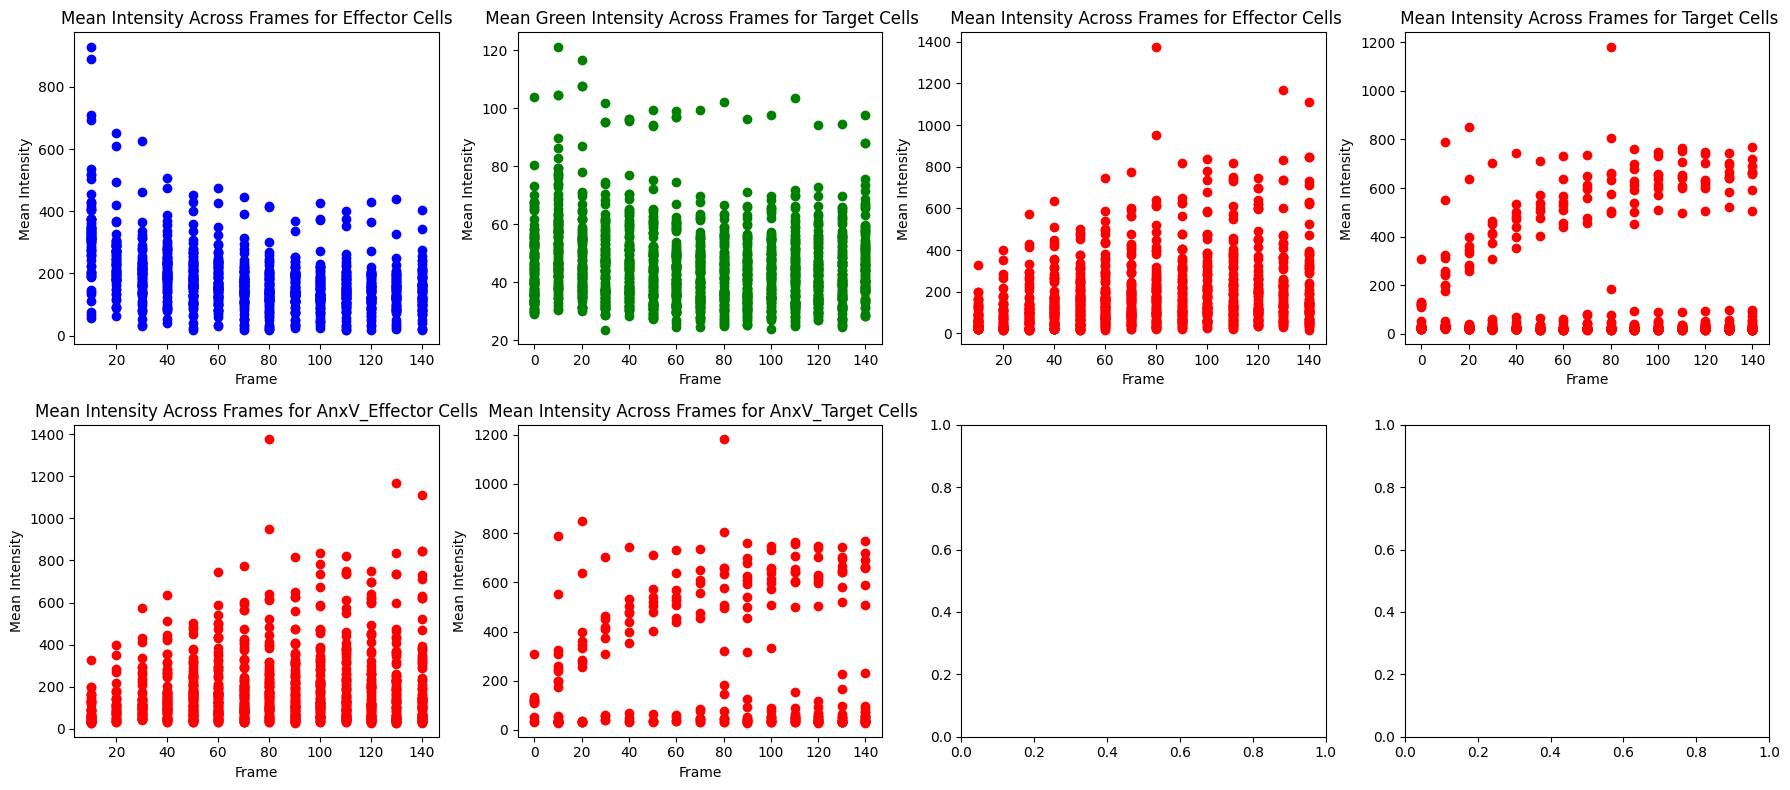

In [51]:

df_effector = df_classified_corrected[df_classified_corrected['defined_effector']==1]
df_target = df_classified_corrected[df_classified_corrected['defined_target'] == 1]
df_effector_death = df_classified_corrected[df_classified_corrected['death_effector'] == 1]
df_target_death = df_classified_corrected[df_classified_corrected['death_target']  == 1]



# scatter plot of mean intensity across Frames for each cell type
fig, axes = plt.subplots(2, 4, figsize=(18, 8))

# Plot 1
axes[0,0].plot(df_effector['frame'], df_effector['mean_intensity_d0'], marker='o', linestyle='None', color='blue')
axes[0,0].set_xlabel('Frame')
axes[0,0].set_ylabel('Mean Intensity')
axes[0,0].set_title('Mean Intensity Across Frames for Effector Cells')
#axes[0].set_ylim(0, 100)  # Set the y-axis limits

# Plot 2
axes[0,1].plot(df_target['frame'], df_target['mean_intensity_d1'], marker='o', linestyle='None', color='green')
axes[0,1].set_xlabel('Frame')
axes[0,1].set_ylabel('Mean Intensity')
axes[0,1].set_title(' Mean Green Intensity Across Frames for Target Cells')
#axes[1].set_ylim(0, 150)
# Plot 3
axes[0,2].plot(df_effector['frame'], df_effector['mean_intensity_d2'], marker='o', linestyle='None', color='red')
axes[0,2].set_xlabel('Frame')
axes[0,2].set_ylabel('Mean Intensity')
axes[0,2].set_title(' Mean Intensity Across Frames for Effector Cells')
#axes[0,2].set_ylim(0, 100)

# Plot 4
axes[0,3].plot(df_target['frame'], df_target['mean_intensity_d2'], marker='o', linestyle='None', color='red')
axes[0,3].set_xlabel('Frame')
axes[0,3].set_ylabel('Mean Intensity')
axes[0,3].set_title(' Mean Intensity Across Frames for Target Cells')
#axes[0,3].set_ylim(0, 100)
# Plot 5
axes[1,0].plot(df_effector_death['frame'], df_effector_death['mean_intensity_d2'], marker='o', linestyle='None', color='red')
axes[1,0].set_xlabel('Frame')
axes[1,0].set_ylabel('Mean Intensity')
axes[1,0].set_title('Mean Intensity Across Frames for AnxV_Effector Cells')
#axes[1,0].set_ylim(0, 100)

# Plot 6
axes[1,1].plot(df_target_death['frame'], df_target_death['mean_intensity_d2'], marker='o', linestyle='None', color='red')
axes[1,1].set_xlabel('Frame')
axes[1,1].set_ylabel('Mean Intensity')
axes[1,1].set_title(' Mean Intensity Across Frames for AnxV_Target Cells')
#axes[1,1].set_ylim(0,100)
# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

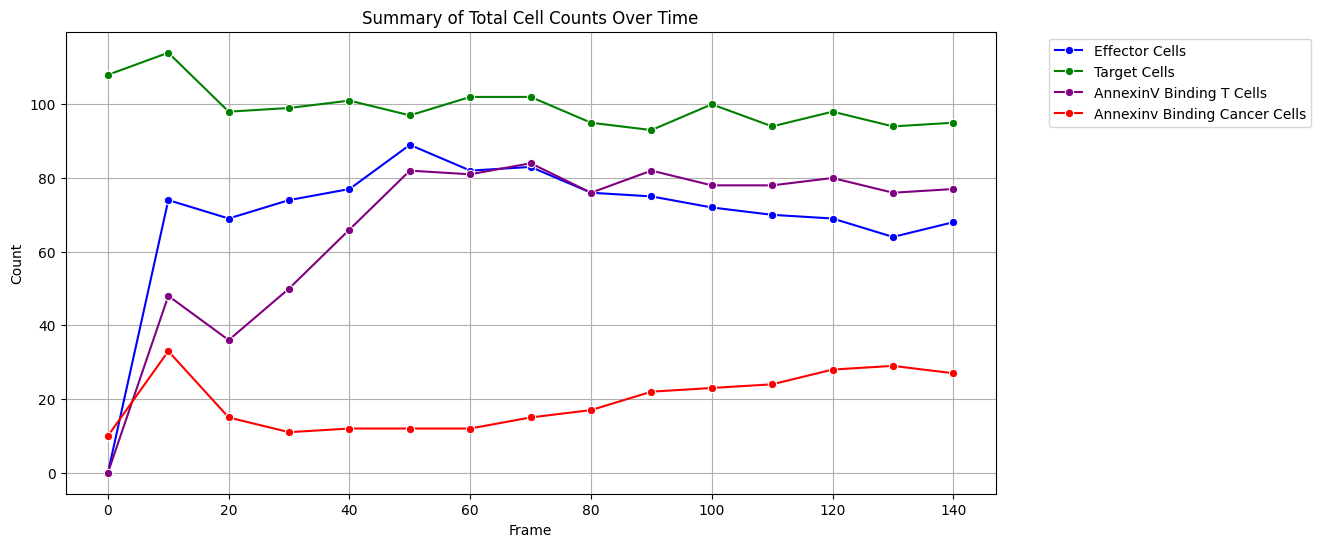

In [52]:
# Group by 'frame' and apply aggregations, plot to show the summary of total cell counts over time

summary4 = df_classified_corrected.groupby(['frame']).agg({
    'defined_effector': 'sum',
    'defined_target': 'sum',
    'death_effector': 'sum',  # Sum of death where effector=1
    'death_target': 'sum'     # Sum of death where target=1
}).reset_index()

# Rename columns to make the output clearer
summary4 = summary4.rename(columns={
    'death_effector': 'death_sum_effector',
    'death_target': 'death_sum_target'
})

# Plot the summary data
plt.figure(figsize=(12, 6))
sns.lineplot(data=summary4, x='frame', y='defined_effector', label='Effector Cells', marker='o', color='blue')
sns.lineplot(data=summary4, x='frame', y='defined_target', label='Target Cells', marker='o', color='green')
sns.lineplot(data=summary4, x='frame', y='death_sum_effector', label='AnnexinV Binding T Cells', marker='o', color='purple')
sns.lineplot(data=summary4, x='frame', y='death_sum_target', label='Annexinv Binding Cancer Cells', marker='o', color='red')

plt.xlabel('Frame')
plt.ylabel('Count')
plt.title('Summary of Total Cell Counts Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

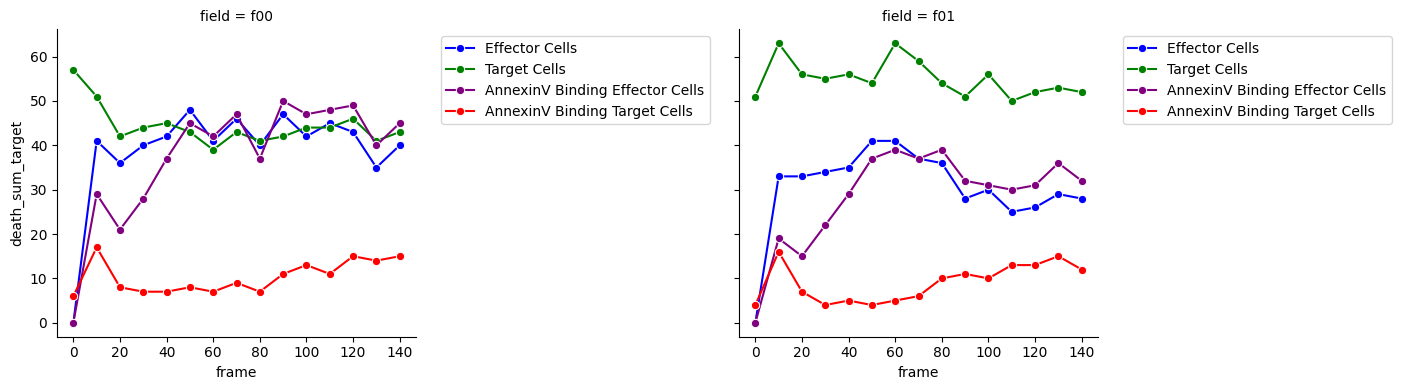

In [53]:
# Group by 'frame' and apply aggregations
summary5 = df_classified_corrected.groupby(['field','frame']).agg({
    'defined_effector': 'sum',
    'defined_target': 'sum',
    'death_effector': 'sum',  # Sum of death where effector=1
    'death_target': 'sum'     # Sum of death where target=1
}).reset_index()

# Rename columns to make the output clearer
summary5 = summary5.rename(columns={
    'death_effector': 'death_sum_effector',
    'death_target': 'death_sum_target'
})

# Create a FacetGrid to plot separate line plots for each "field" value
g = sns.FacetGrid(summary5, col="field", col_wrap=3, height=4, sharex=True, sharey=True)

# Map the lineplot for each facet
g.map(sns.lineplot, 'frame', 'defined_effector', label='Effector Cells', marker='o', color='blue')
g.map(sns.lineplot, 'frame', 'defined_target', label='Target Cells', marker='o', color='green')
g.map(sns.lineplot, 'frame', 'death_sum_effector', label='AnnexinV Binding Effector Cells', marker='o', color='purple')
g.map(sns.lineplot, 'frame', 'death_sum_target', label='AnnexinV Binding Target Cells', marker='o', color='red')

# Add a legend to each plot
for ax in g.axes.flatten():
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
g.fig.set_size_inches(18, 4)

# Adjust layout
plt.tight_layout()
plt.show()

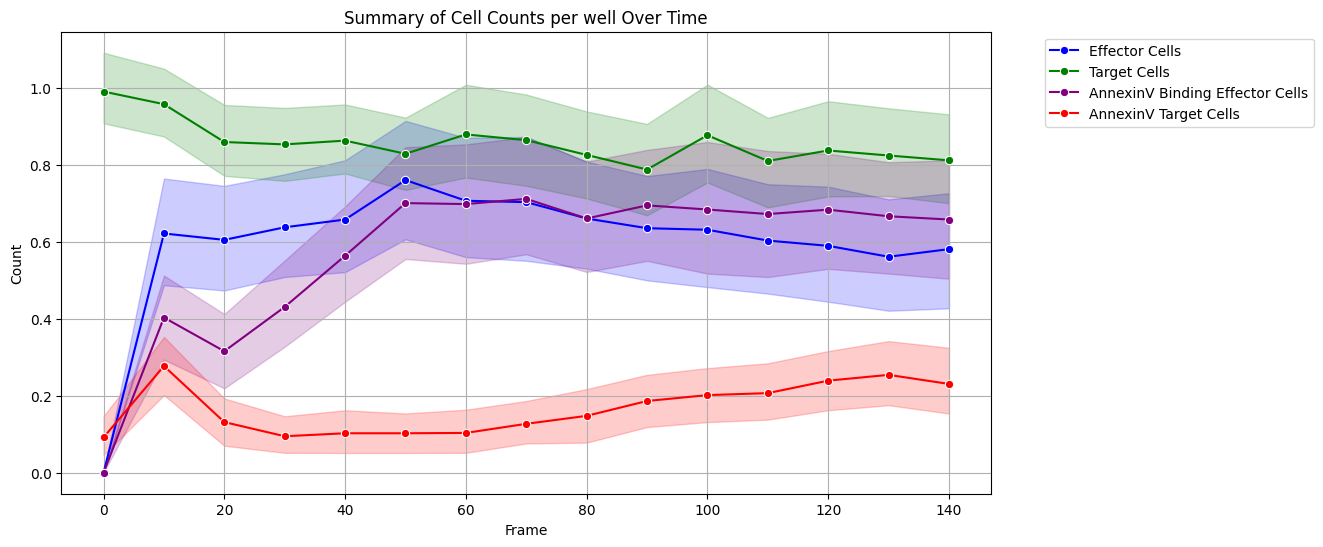

In [54]:

# Group by 'well' and apply aggregations
summary6 = df_classified_corrected.groupby(['field','well','frame']).agg({
    'defined_effector': 'sum',
    'defined_target': 'sum',
    'death_effector': 'sum',  # Sum of death where effector=1
    'death_target': 'sum'     # Sum of death where target=1
}).reset_index()

# Rename columns to make the output clearer
summary6 = summary6.rename(columns={
    'death_effector': 'death_sum_effector',
    'death_target': 'death_sum_target'
})

# Display summary
summary5

# Plot the summary data
plt.figure(figsize=(12, 6))
sns.lineplot(data=summary6, x='frame', y='defined_effector', label='Effector Cells', marker='o', color='blue')
sns.lineplot(data=summary6, x='frame', y='defined_target', label='Target Cells', marker='o', color='green')
sns.lineplot(data=summary6, x='frame', y='death_sum_effector', label='AnnexinV Binding Effector Cells', marker='o', color='purple')
sns.lineplot(data=summary6, x='frame', y='death_sum_target', label='AnnexinV Target Cells', marker='o', color='red')

plt.xlabel('Frame')
plt.ylabel('Count')
plt.title('Summary of Cell Counts per well Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [55]:
# Group by 'field', 'frame', 'effector', and 'target', then count occurrences of each combination
well_count = summary6.groupby(['field','frame', 'defined_effector', 'defined_target']).size().reset_index(name='well_count')

# Filter for specific combinations of effector and target
filtered_well_count = well_count[
    (well_count['defined_effector'].isin([0, 1, 2, 3,4])) & 
    (well_count['defined_target'].isin([0, 1,2,3,4]))
]

# Display the result for frame 20
filtered_well_count[filtered_well_count['frame'] == 20].groupby(['frame', 'defined_effector', 'defined_target'])[['well_count']].sum()

well_count
frame defined_effector defined_target            
20    0                0                        3
                       1                       56
                       2                        1
      1                0                       12
                       1                       25
                       2                        2
                       3                        2
      2                0                        6
                       1                        5
      3                0                        2

In [56]:
filtered_well_count.groupby(['frame', 'defined_effector', 'defined_target'])[['well_count']].sum()

well_count
frame defined_effector defined_target            
0     0                0                        8
                       1                       98
                       3                        2
                       4                        1
10    0                0                        1
...                                           ...
140   2                0                        6
                       1                        3
      3                0                        2
                       1                        2
      4                1                        1

[164 rows x 1 columns]

# Effector-Target Cells Interaction
1. Calculate the Proximity Between Effector (E) and Target (T) Cells for Each Well
2. Determine Effector-Target (ET) Touching Events
3. Analyze the Correlation Between Cell Death and ET Touching Events
4. Analyze the Duration of ET Touching and Its Association with Cell Death

In [2]:
df = pd.read_csv('/Users/lieli/Documents/PROJECTS/test_1c/measurements_using_seg_ori_d3/cropped_corrected_classified_final_output.csv')
df

field  well  frame  cell          X         Y  mean_intensity_d0  \
0      f00     1      0     1   64.52103  67.32696           11.99522   
1      f00     1     30     1  101.27717  85.88587          111.38587   
2      f00     1     40     1  105.93200  82.28400          107.28000   
3      f00     1     50     1  104.03646  89.31771           86.42708   
4      f00     1     60     1  106.00610  52.94512           83.57317   
...    ...   ...    ...   ...        ...       ...                ...   
2771   f01    71     60     2   34.44538  87.62605           83.65966   
2772   f01    72      0     1   55.71520  59.21471           10.22014   
2773   f01    72     10     1   80.05470  95.24807           14.69392   
2774   f01    73     10     1   80.05470  95.24807           14.69392   
2775   f01    76      0     1   55.71520  59.21471           10.22014   

      mean_intensity_d1  mean_intensity_d2  area  ...  effector  target  \
0              43.21128           22.59465  1046  ...         0       1   
1              35.78261          141.16304   184  ...         1       0   
2              34.68800          153.02400   125  ...         1       0   
3              27.48958          182.41667   192  ...         1       0   
4              27.45122          196.75610   164  ...         1       0   
...                 ...                ...   ...  ...       ...     ...   
2771           27.47479           44.97479   238  ...         1       0   
2772           30.66338           24.12340  1013  ...         0       1   
2773          104.46851           31.52265   905  ...         0       1   
2774          104.46851           31.52265   905  ...         0       1   
2775           30.66338           24.12340  1013  ...         0       1   

      death  death_effector death_target defined_effector defined_target  \
0         0               0            0                0              1   
1         1               1            0                1              0   
2         1               1            0                1              0   
3         1               1            0                1              0   
4         1               1            0                1              0   
...     ...             ...          ...              ...            ...   
2771      1               1            0                1              0   
2772      0               0            0                0              1   
2773      1               0            1                0              1   
2774      1               0            1                0              1   
2775      0               0            0                0              1   

     double_pos  double_neg  cell_type  
0             0           0          T  
1             0           0          E  
2             0           0          E  
3             0           0          E  
4             0           0          E  
...         ...         ...        ...  
2771          0           0          E  
2772          0           0          T  
2773          0           0          T  
2774          0           0          T  
2775          0           0          T  

[2776 rows x 28 columns]

In [8]:


# Call the function to calculate proximity

proximity_df = proximity(df)
print(f'Avg Distance btw Effector and Target cells: {proximity_df["E-T_distance"].mean()}')
print(proximity_df["E-T_distance"].describe())
proximity_df

Avg Distance btw Effector and Target cells: 57.21179578068557
count    647.000000
mean      57.211796
std       17.026245
min       25.159931
25%       44.241049
50%       55.113142
75%       71.103670
max       97.660079
Name: E-T_distance, dtype: float64


field  frame  well  E_cell_ID  T_cell_ID  E-T_distance
0     f00     10     6          1          2     55.619017
1     f00     10     8          1          2     31.084349
2     f00     10     9          2          1     49.267848
3     f00     10    12          1          2     78.555794
4     f00     10    12          3          2     30.125508
..    ...    ...   ...        ...        ...           ...
642   f01    140    52          2          1     55.106299
643   f01    140    55          1          2     39.401288
644   f01    140    55          3          2     50.026757
645   f01    140    68          2          1     60.595787
646   f01    140    69          2          1     60.595787

[647 rows x 6 columns]

### calculate the average distance between effector and target cells for each 1:1 E/T well

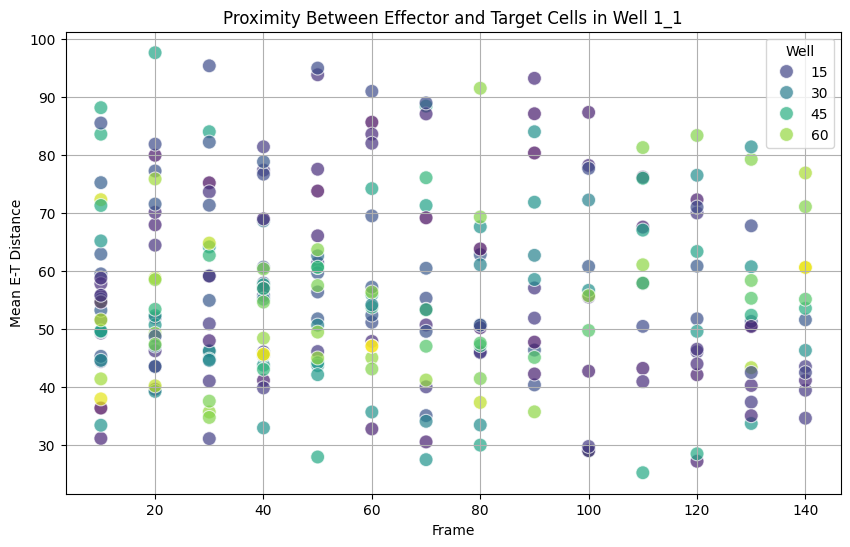

    frame  E-T_distance_mean  E-T_distance_std
0      10          55.831944         14.757247
1      20          58.261259         15.677466
2      30          56.823797         17.498006
3      40          55.974466         13.320728
4      50          58.599581         16.131918
5      60          58.255798         16.976366
6      70          55.724845         19.678399
7      80          52.723300         15.244807
8      90          60.265533         18.733410
9     100          55.698332         19.591208
10    110          58.708810         16.572154
11    120          55.513546         17.138014
12    130          52.459311         14.446697
13    140          52.049063         12.656663


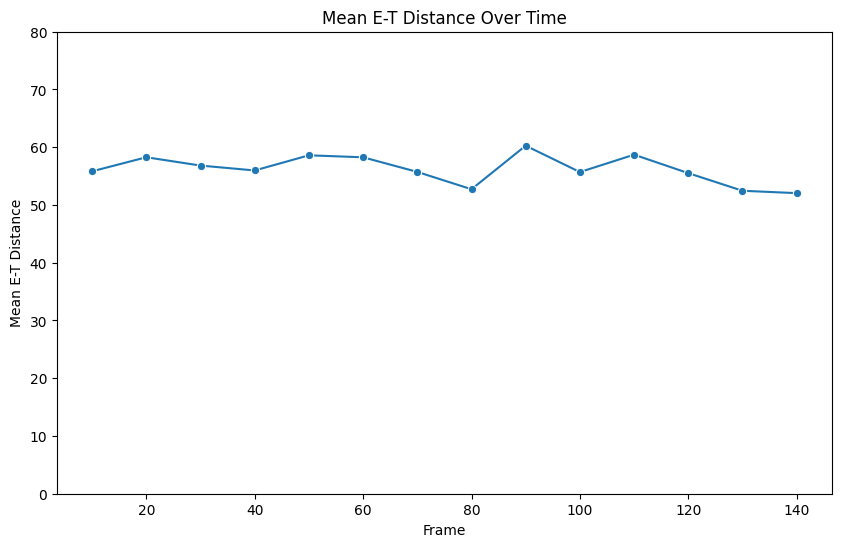

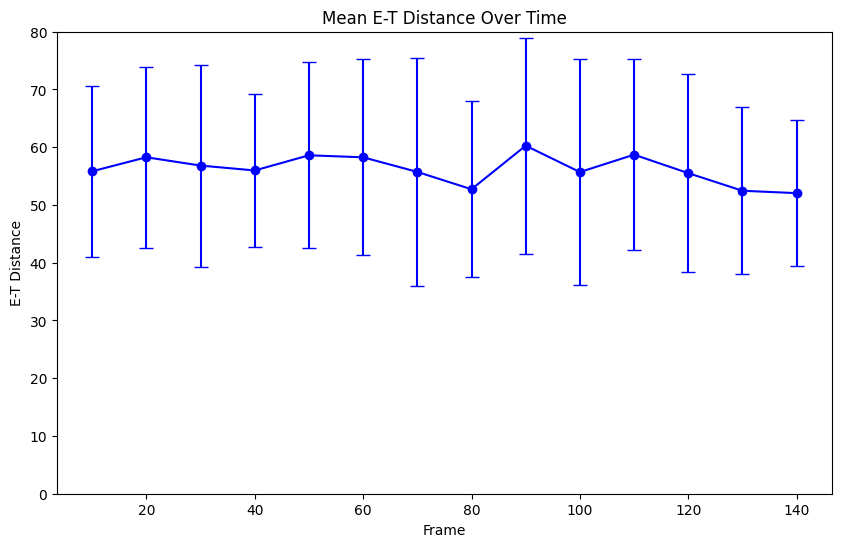

In [35]:

# Group by 'well' and apply aggregations
df_grouped = df.groupby(['field','well','frame']).agg({
    'defined_effector': 'sum',
    'defined_target': 'sum',
    'death_effector': 'sum',  # Sum of death where effector=1
    'death_target': 'sum'     # Sum of death where target=1
}).reset_index()

# add a new column to show the type of effector and target
df_grouped['well_type'] = df_grouped['defined_effector'].astype(str) + '_' + df_grouped['defined_target'].astype(str)

df_grouped

# filter out the 1_1 wells
df_grouped_11 = df_grouped[df_grouped['well_type'] == '1_1']
df_grouped_11

# merge the df_grouped_11 with the proximity_df, only keep the records where the well is 1_1
df_merged_11 = pd.merge(df_grouped_11, proximity_df, on=['field', 'well', 'frame'], how='inner')
df_merged_11


# Create a scatter plot to show the proximity between E and T cells in well 1_1 over the frames
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged_11, x='frame', y='E-T_distance', hue='well', palette='viridis', s=100, alpha=0.7)
plt.xlabel('Frame')
plt.ylabel('Mean E-T Distance')
plt.title('Proximity Between Effector and Target Cells in Well 1_1')
plt.legend(title='Well')
plt.grid(True)
plt.show()

# Group by 'well' and apply aggregations
df_merged_11_grouped = df_merged_11.groupby(['frame'])[['E-T_distance']].agg(['mean', 'std']).reset_index()
df_merged_11_grouped.columns = ['frame', 'E-T_distance_mean', 'E-T_distance_std']

print(df_merged_11_grouped)

# Create a scatter plot to show the average proximity between E and T cells in well 1_1 over the frames
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=df_merged_11_grouped, 
    x='frame', 
    y='E-T_distance_mean', 
    marker='o'
)
plt.ylim(0, 80)
plt.xlabel('Frame')
plt.ylabel('Mean E-T Distance')
plt.title('Mean E-T Distance Over Time')
plt.show()


# Add the standard deviation as error bars
# Create a scatter plot to show the average proximity between E and T cells in well 1_1 over the frames
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=df_merged_11_grouped, 
    x='frame', 
    y='E-T_distance_mean', 
    marker='o',
    color='blue'
)
plt.errorbar(
    df_merged_11_grouped['frame'], 
    df_merged_11_grouped['E-T_distance_mean'], 
    yerr=df_merged_11_grouped['E-T_distance_std'], 
    fmt='o', 
    ecolor='blue',
    capsize=5,
    color='blue'
)

plt.ylim(0, 80)

plt.xlabel('Frame')
plt.ylabel('E-T Distance')
plt.title('Mean E-T Distance Over Time')
plt.show()

# Effector-Target Cells Movement
1. Calculate the Moving Speed of Effector (E) and Target (T) Cells Across Frames
2. Analyze the Correlation Between Moving Speed and the Presence and Distance of Effector-Target (ET) Cells

In [ ]:
# filter out the wells only have single tumor cell across all frames, calculate the mean cell moving speed for each well within each field
# filter out the wells only have single T cell across all frames, calculate the mean cell moving speed for each well within each field
# filter out the wells only have  1 tumor cell and 1 T cell across all frames, calculate the mean cell moving speed for each cell in each well within each field

# Cell possible prelifiration and death analysis based on cell count
1. cell count for each cell type each well
2. add the cell count trends for each well within each field
3. call cell events (no event, cell division, cell death) based on the trends

# Cell Tracking Analysis
1. Match Cells Based on Cell Type and Moving Distance Between Sequential Frames
2. Track Cell Trajectories Across Frames